In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# %config InlineBackend.figure_format = 'svg'

/tmp/ipykernel_22525/3080622048.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = uproot.open("/home/tbui/G4SimDetectorBox-main/build/output0_t0.root")["Scoring"].arrays(library="pd")
print(len(df.query("c0fEdep>0.76").index))

0


In [4]:
df.keys()

Index(['c0fEdep', 'c1Xgen', 'c2Ygen', 'c3Zgen', 'c4PMT0SC', 'c5PMT1SC',
       'c6PMT2SC'],
      dtype='object')

In [5]:
pmt0 = df['c4PMT0SC']
pmt1 = df['c5PMT1SC']
pmt2 = df['c6PMT2SC']

In [6]:
print("PMT0: ", pmt0)
print("PMT1: ", pmt1)
print("PMT2: ", pmt2) ###PMT2 empty since using only 2 PMTs

PMT0:  0    44.0
Name: c4PMT0SC, dtype: float64
PMT1:  0    46.0
Name: c5PMT1SC, dtype: float64
PMT2:  0    0.0
Name: c6PMT2SC, dtype: float64


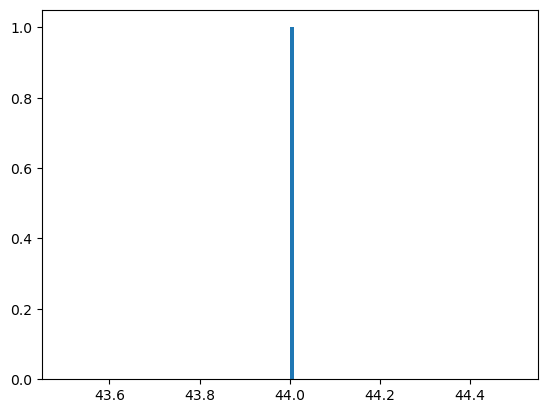

In [9]:
plt.hist(df['c4PMT0SC'], bins=100);

In [7]:
# 2.5 8149
# 2 8230
# 1.5 8141
# 1 7487

In [8]:
df

,c0fEdep,c1Xgen,c2Ygen,c3Zgen,c4PMT0SC,c5PMT1SC,c6PMT2SC
0,0.0,0.0,0.0,0.0,179.0,191.0,0.0


In [11]:
def plotOverlayCut(var,xlow,xhigh,nbins=100,cut="c0fEdep>-1",dolog=0,densitySetting=0):
    plt.figure(figsize=(10,7))
    plt.hist(df.query(cut)[var],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label="1");
    plt.xlim(xlow,xhigh)
    plt.xlabel(var)
    plt.legend()
    if(dolog):
        plt.yscale('log') 
    plt.show()
    
def plotOverlayCutList(var,xlow,xhigh,nbins=100,cuts=["c0fEdep>-1"],dolog=0,densitySetting=0):
    plt.figure(figsize=(10,7))
    for i in cuts:
        plt.hist(df.query(i)[var],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label=i);
    plt.xlim(xlow,xhigh)
    plt.xlabel(var)
    plt.legend()
    if(dolog):
        plt.yscale('log') 
    plt.show()
    
    

def plotOverlayPMTHitsCut(xlow,xhigh,nbins=100,cut="c0fEdep>-1",dolog=0,densitySetting=0):
    plt.figure(figsize=(10,7))
    plt.hist(df.query(cut)["c4PMT0SC"],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label="0");
    plt.hist(df.query(cut)["c5PMT1SC"],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label="1");
    plt.hist(df.query(cut)["c6PMT2SC"],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label="2");
    plt.xlim(xlow,xhigh)
#     plt.xlabel(var)
    plt.legend()
    if(dolog):
        plt.yscale('log') 
    plt.show()
    

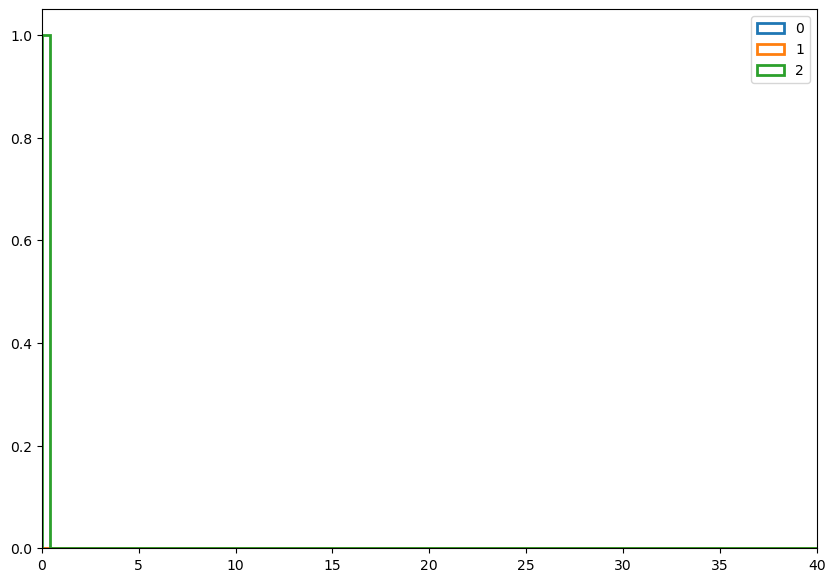

In [12]:
plotOverlayPMTHitsCut(0,40)

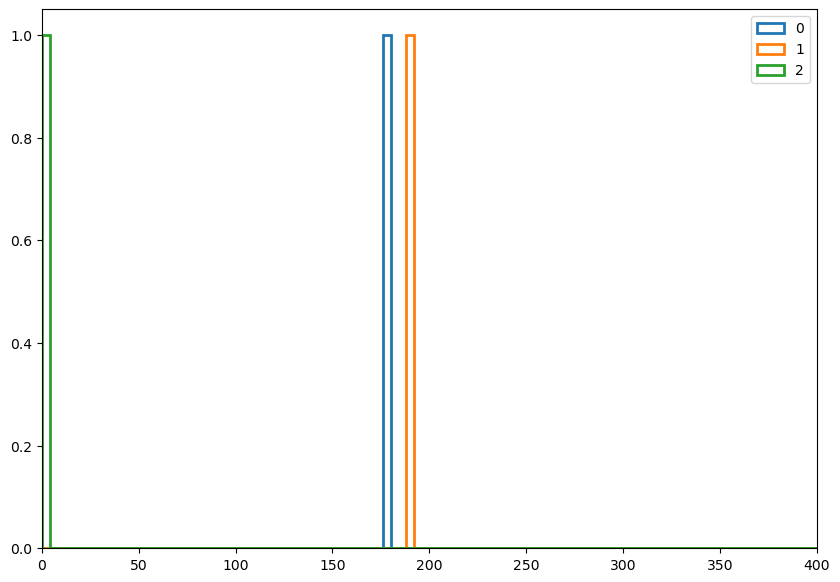

In [13]:
plotOverlayPMTHitsCut(0,400)

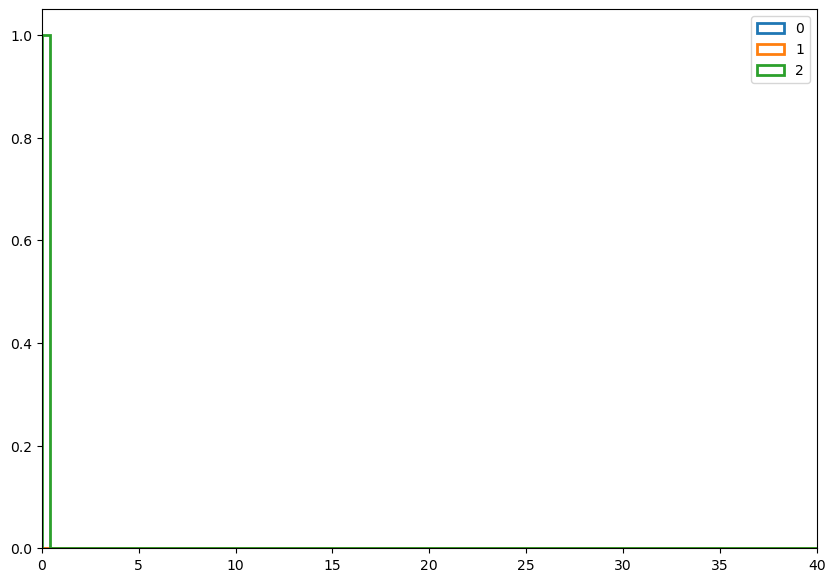

In [14]:
plotOverlayPMTHitsCut(0,40)

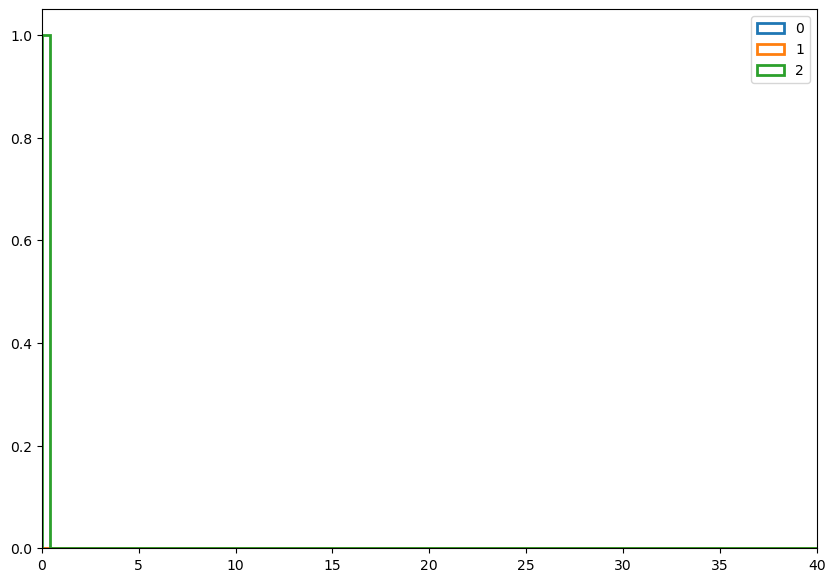

In [15]:
plotOverlayPMTHitsCut(0,40)

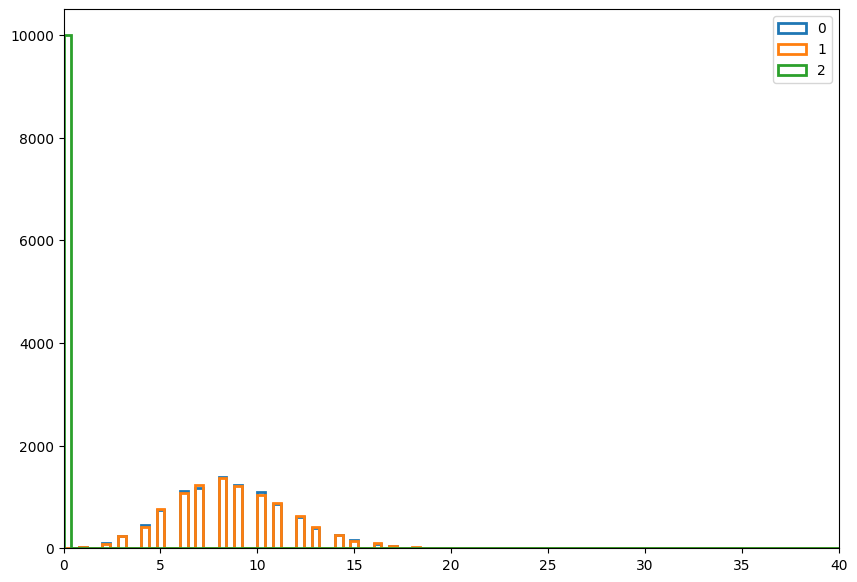

In [40]:
plotOverlayPMTHitsCut(0,40)

In [16]:
df["r"] = (df["c1Xgen"]**2 + df["c2Ygen"]**2)**0.5

df["SumPMTSC"] = (df["c4PMT0SC"]+df["c5PMT1SC"]+df["c6PMT2SC"])
df["DalitzX"] = 0.5*(df["c4PMT0SC"]+(2*df["c5PMT1SC"]))/df["SumPMTSC"]
df["DalitzY"] = (3**0.5)*0.5*(df["c4PMT0SC"])/df["SumPMTSC"]

In [17]:
print(len(df.query("c0fEdep>0.76").index))

0


In [8]:
cuts = ["c0fEdep>-1","c0fEdep<0.1","c0fEdep>0.76","c0fEdep>0.1 and c0fEdep<0.76"]

plotOverlayCutList("c3Zgen",-5,10,cuts=cuts)
plotOverlayCutList("r",0,10,cuts=cuts)
plotOverlayCutList("c1Xgen",-10,10,cuts=cuts)


NameError: name 'plotOverlayCutList' is not defined

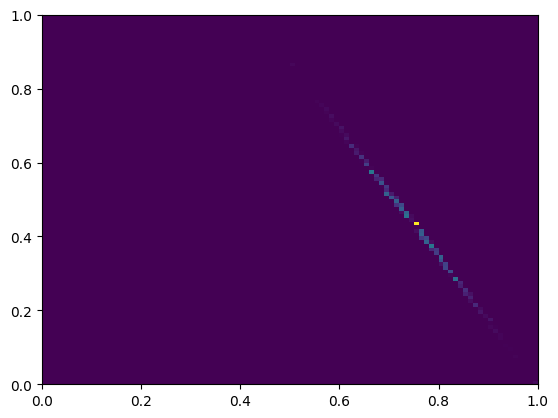

In [9]:
plt.hist2d(df["DalitzX"], df["DalitzY"], bins=[100,100], range=((0,1),(0,1)));

In [11]:
def plotOverlayCut(var,xlow,xhigh,nbins=100,cut="c0fEdep>-1",dolog=0,densitySetting=0):
    plt.figure(figsize=(10,7))
    plt.hist(df.query(cut)[var],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label="1");
    plt.xlim(xlow,xhigh)
    plt.xlabel(var)
    plt.legend()
    if(dolog):
        plt.yscale('log') 
    plt.show()
    
def plotOverlayCutList(var,xlow,xhigh,nbins=100,cuts=["c0fEdep>-1"],dolog=0,densitySetting=0):
    plt.figure(figsize=(10,7))
    for i in cuts:
        plt.hist(df.query(i)[var],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label=i);
    plt.xlim(xlow,xhigh)
    plt.xlabel(var)
    plt.legend()
    if(dolog):
        plt.yscale('log') 
    plt.show()
    
    

def plotOverlayPMTHitsCut(xlow,xhigh,nbins=100,cut="c0fEdep>-1",dolog=0,densitySetting=0):
    plt.figure(figsize=(10,7))
    plt.hist(df.query(cut)["c4PMT0SC"],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label="0");
    plt.hist(df.query(cut)["c5PMT1SC"],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label="1");
    plt.hist(df.query(cut)["c6PMT2SC"],range=[xlow,xhigh],bins=nbins,density=densitySetting,histtype="step",lw=2,label="2");
    plt.xlim(xlow,xhigh)
#     plt.xlabel(var)
    plt.legend()
    if(dolog):
        plt.yscale('log') 
    plt.show()
    

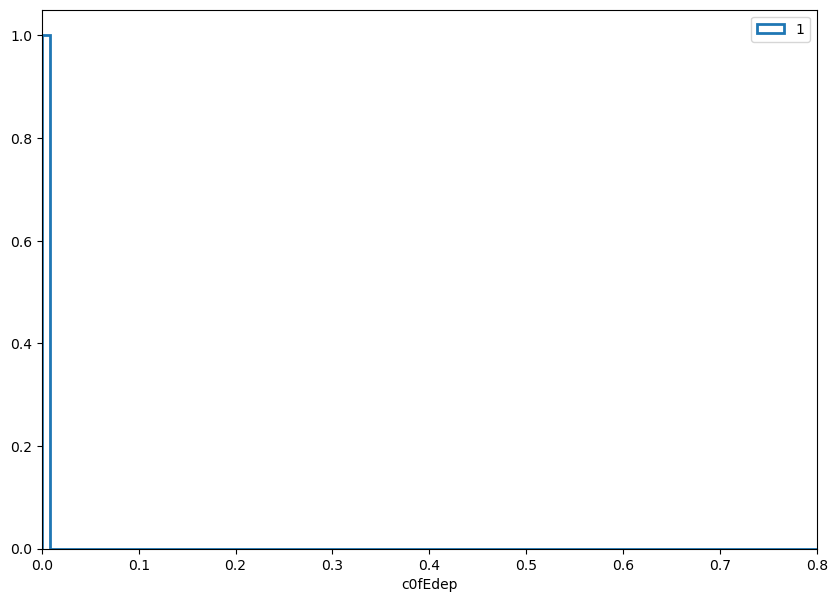

In [18]:
plotOverlayCut("c0fEdep",0.,0.8)

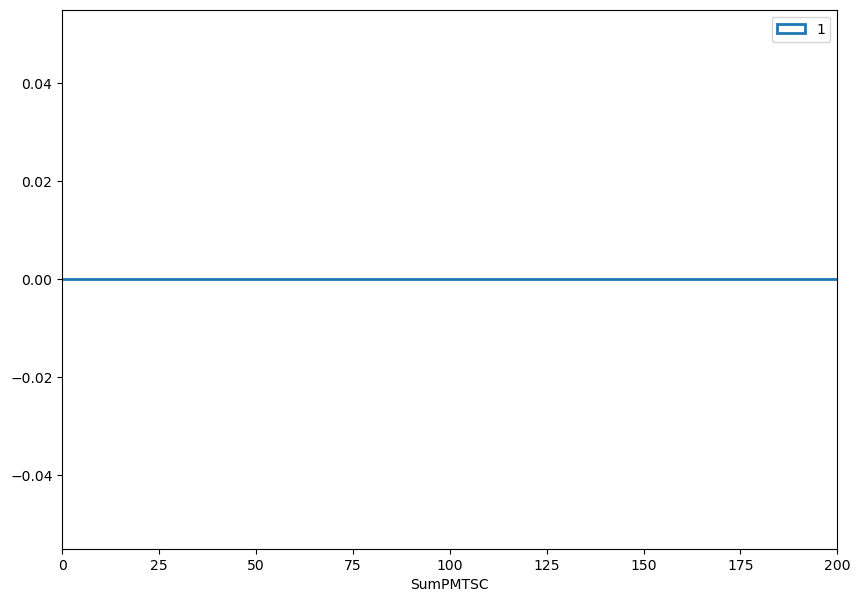

In [19]:
plotOverlayCut("SumPMTSC",0,200)

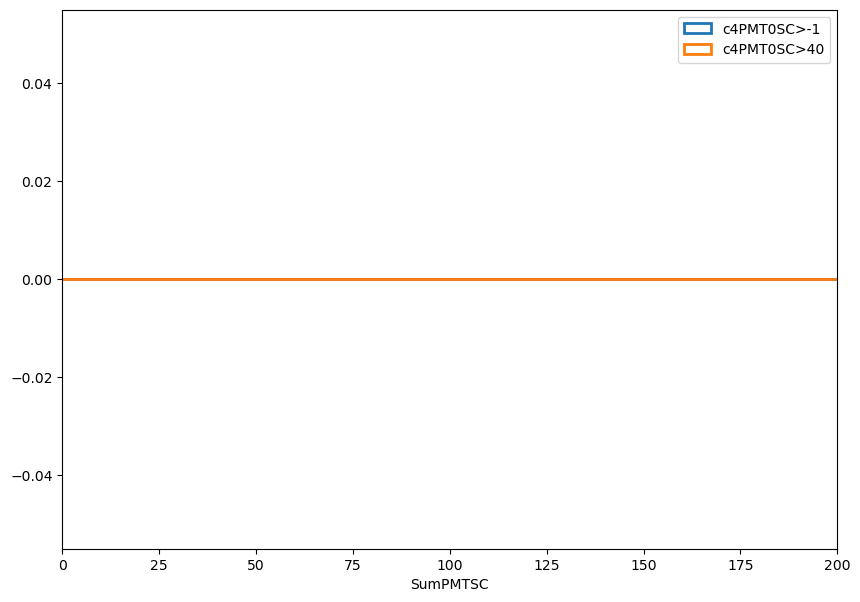

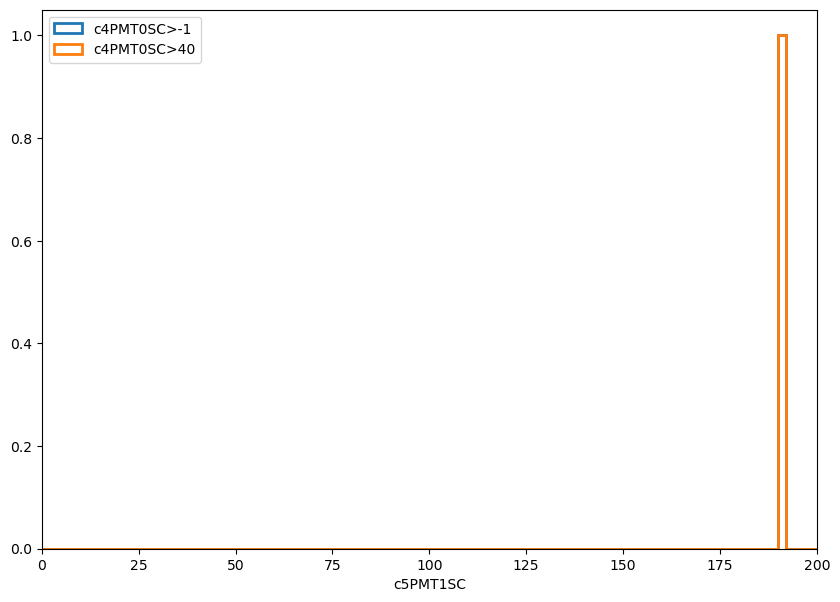

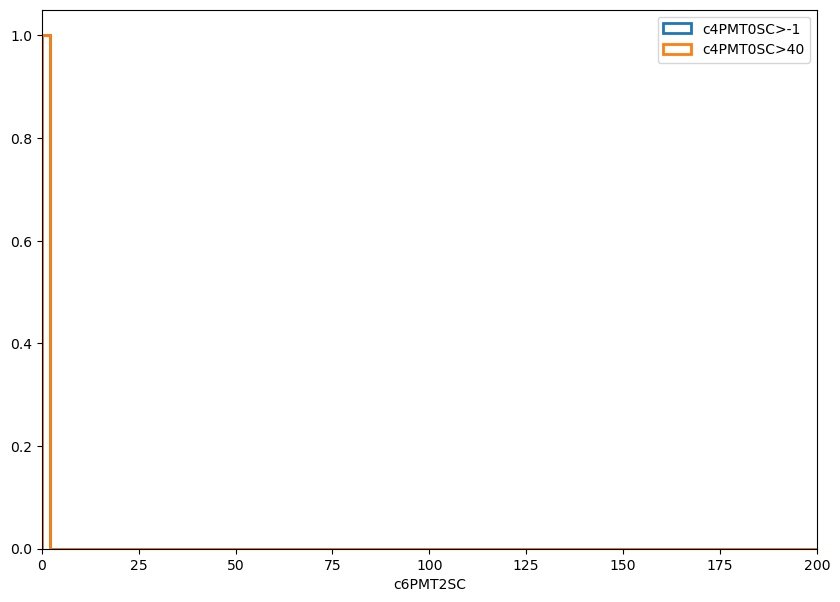

In [20]:

cuts = ["c4PMT0SC>-1","c4PMT0SC>40"]

plotOverlayCutList("SumPMTSC",0,200,cuts=cuts)
plotOverlayCutList("c5PMT1SC",0,200,cuts=cuts)
plotOverlayCutList("c6PMT2SC",0,200,cuts=cuts)


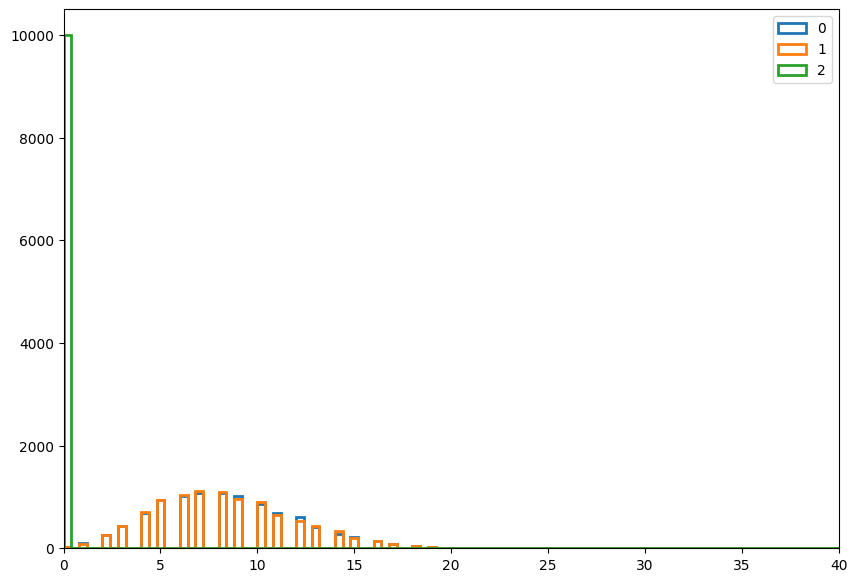

In [19]:
plotOverlayPMTHitsCut(0,40)

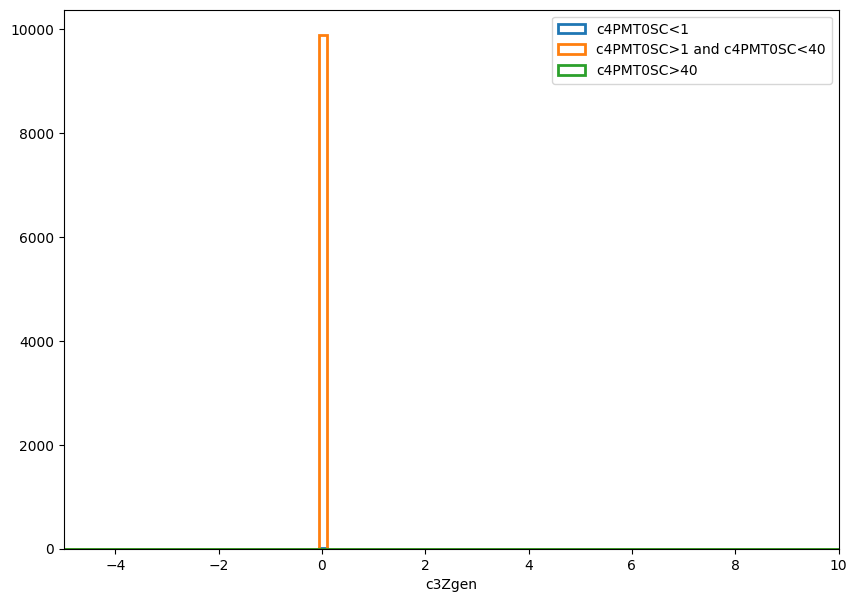

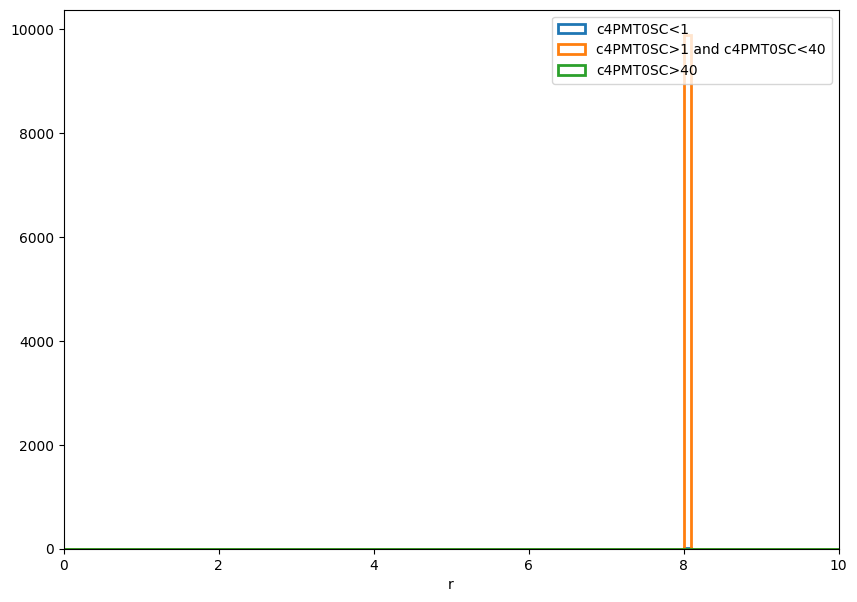

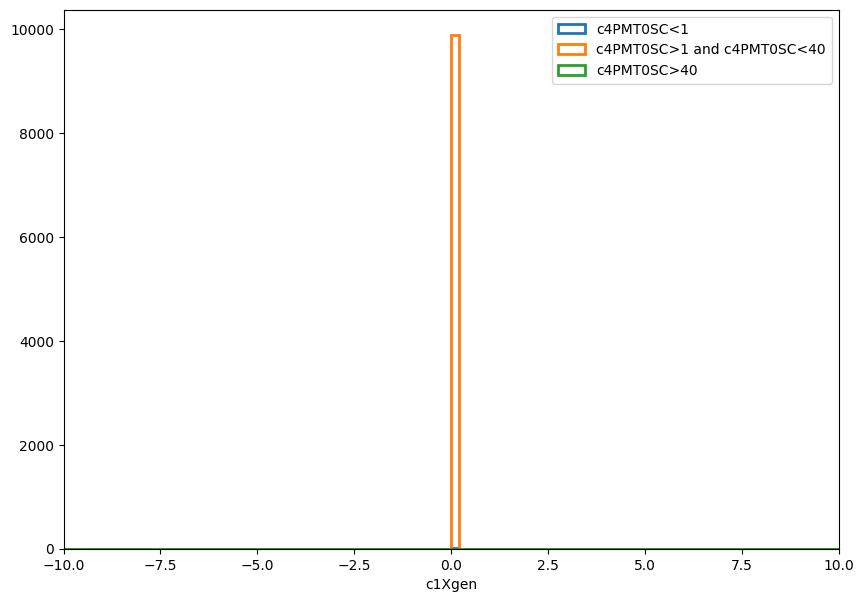

In [16]:
cuts = ["c4PMT0SC<1","c4PMT0SC>1 and c4PMT0SC<40","c4PMT0SC>40"]

plotOverlayCutList("c3Zgen",-5,10,cuts=cuts)
plotOverlayCutList("r",0,10,cuts=cuts)
plotOverlayCutList("c1Xgen",-10,10,cuts=cuts)


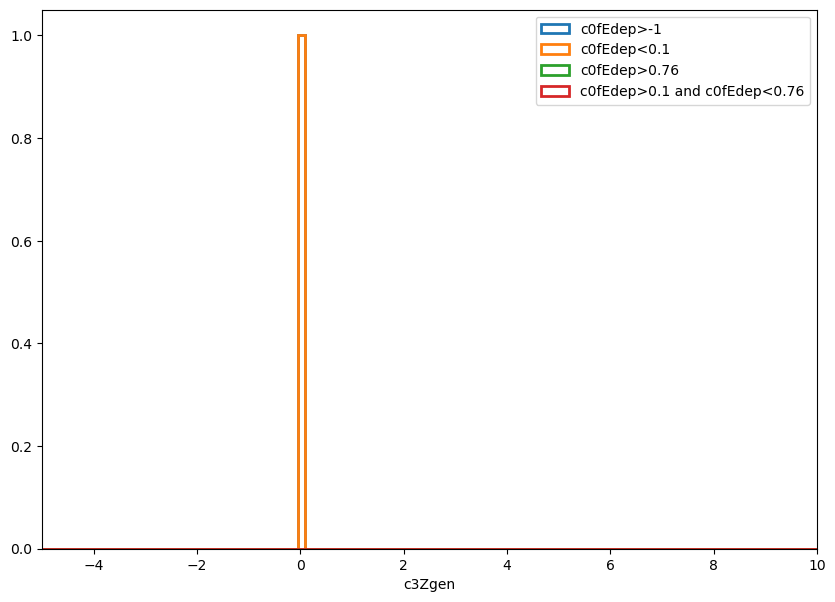

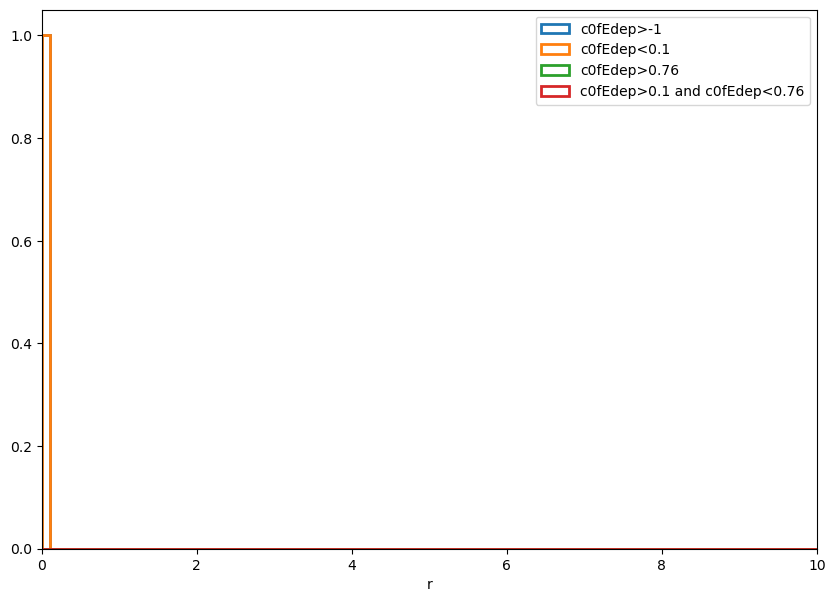

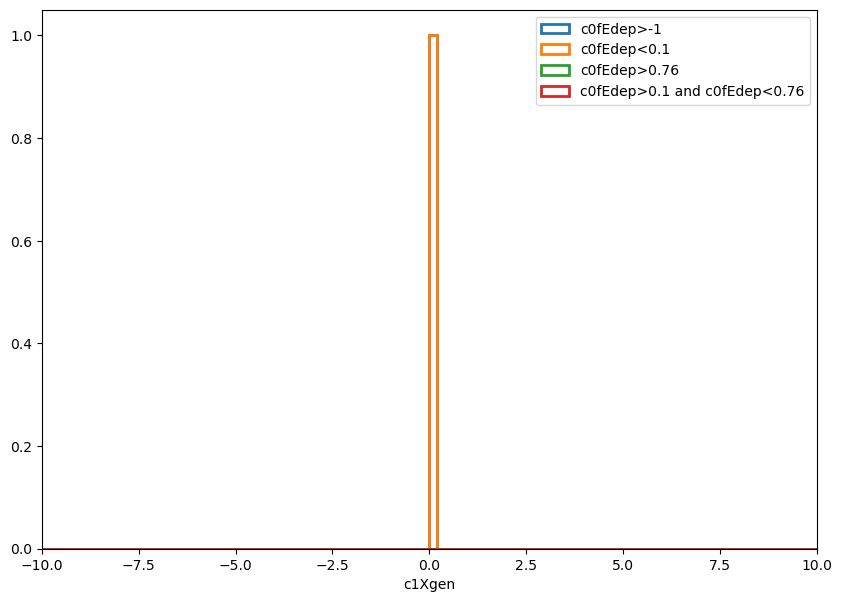

In [21]:
cuts = ["c0fEdep>-1","c0fEdep<0.1","c0fEdep>0.76","c0fEdep>0.1 and c0fEdep<0.76"]

plotOverlayCutList("c3Zgen",-5,10,cuts=cuts)
plotOverlayCutList("r",0,10,cuts=cuts)
plotOverlayCutList("c1Xgen",-10,10,cuts=cuts)


In [16]:
# print(len(df_rec.query("(gamgenp0_p>0.1)==0")))
# print(len(df_rec.query("gamgenp0_mcP<0.1 and 0.55<pRecoilTheta<2.25")))
# print(len(df_rec.query("0.5<mRecoil<1.5 and 0.5<pRecoilTheta<2.2")))

1458


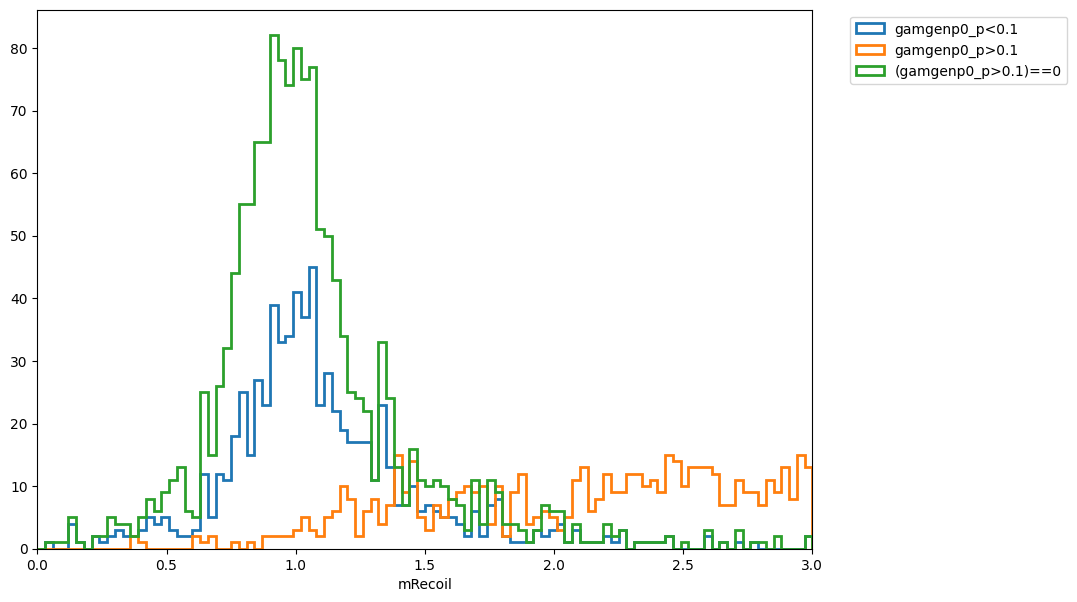

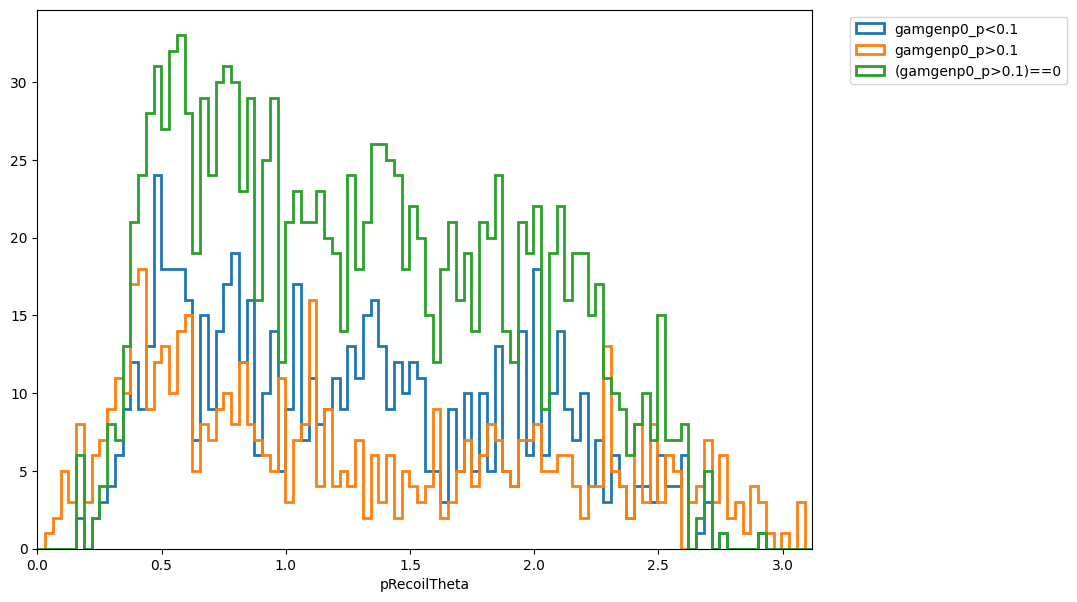

In [18]:
cuts=["gamgenp0_p<0.1","gamgenp0_p>0.1","(gamgenp0_p>0.1)==0"]
plotOverlayCutList("mRecoil",0,3,cuts=cuts)
plotOverlayCutList("pRecoilTheta",0,3.12,cuts=cuts)


/opt/homebrew/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


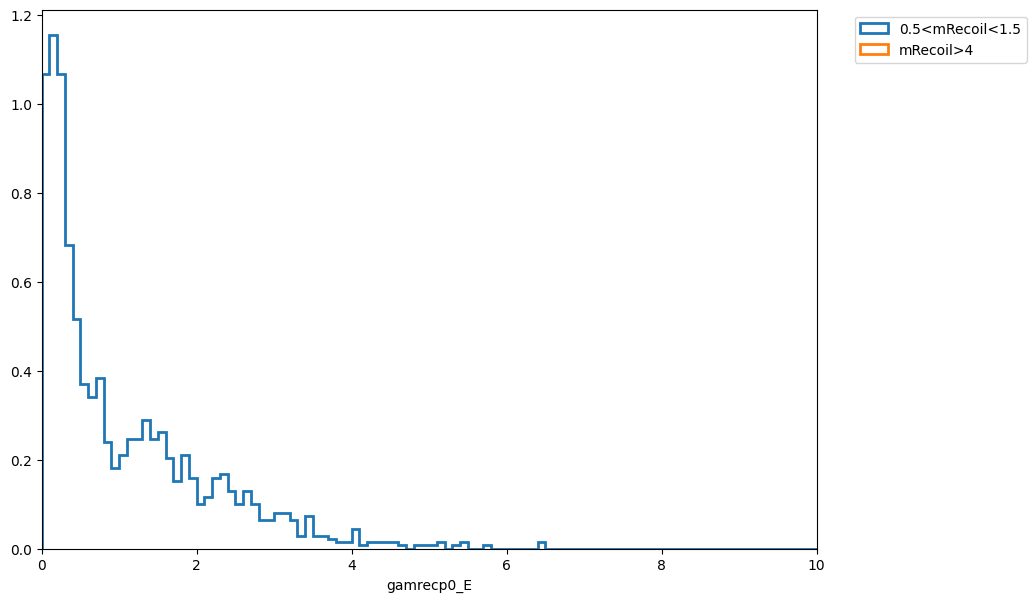

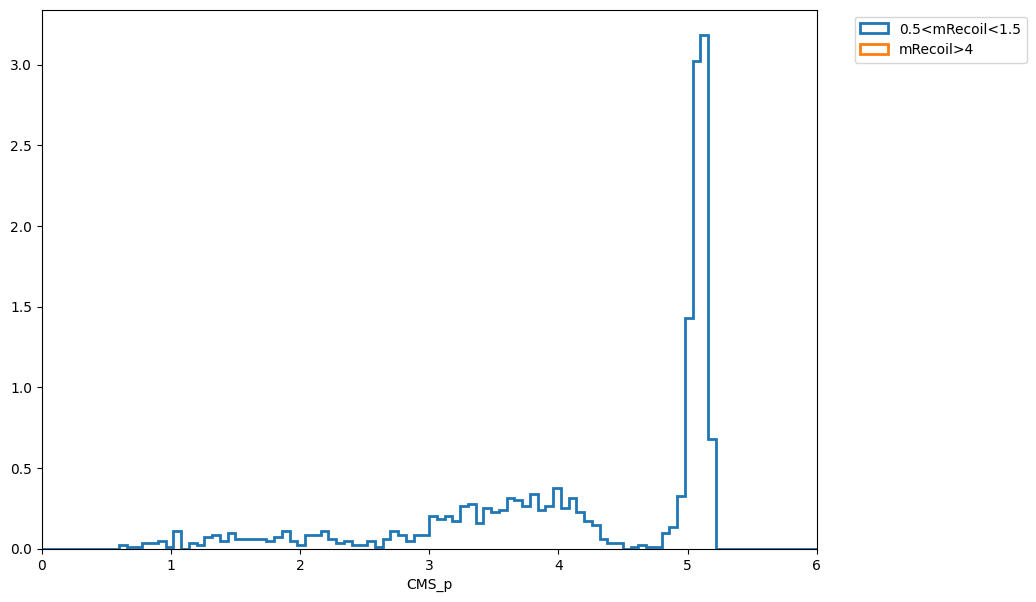

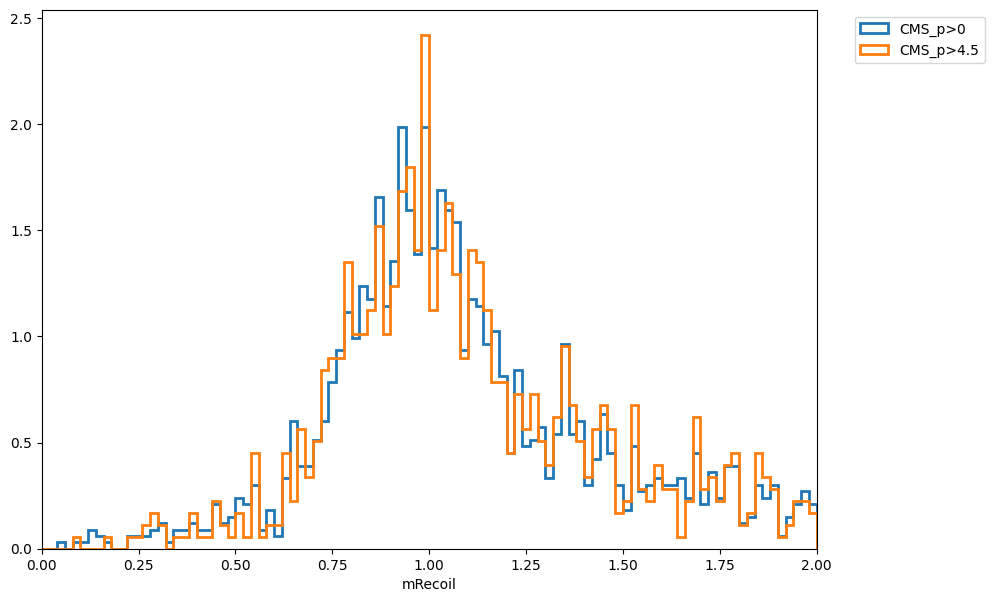

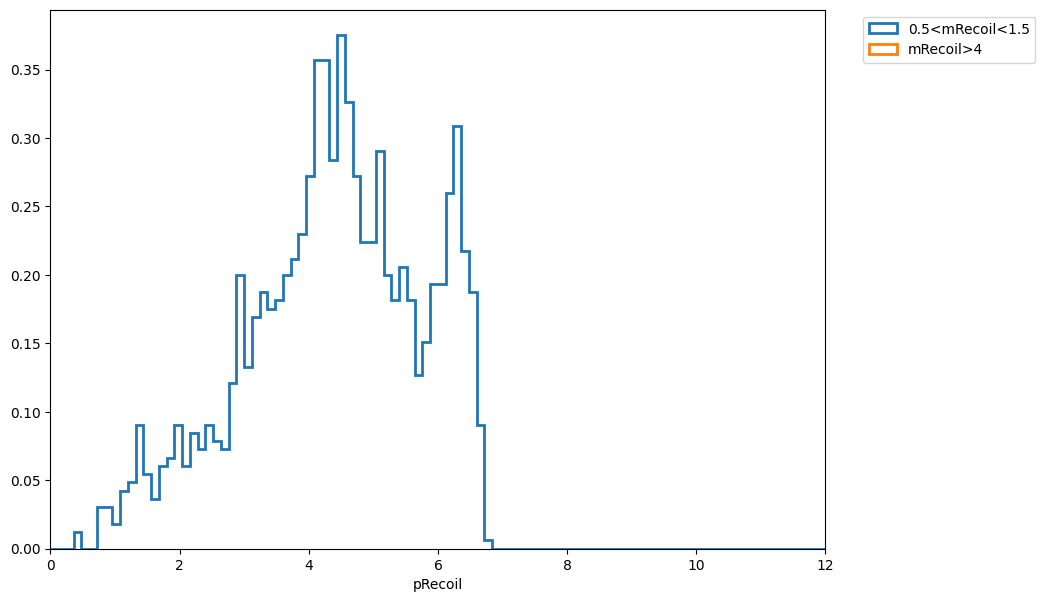

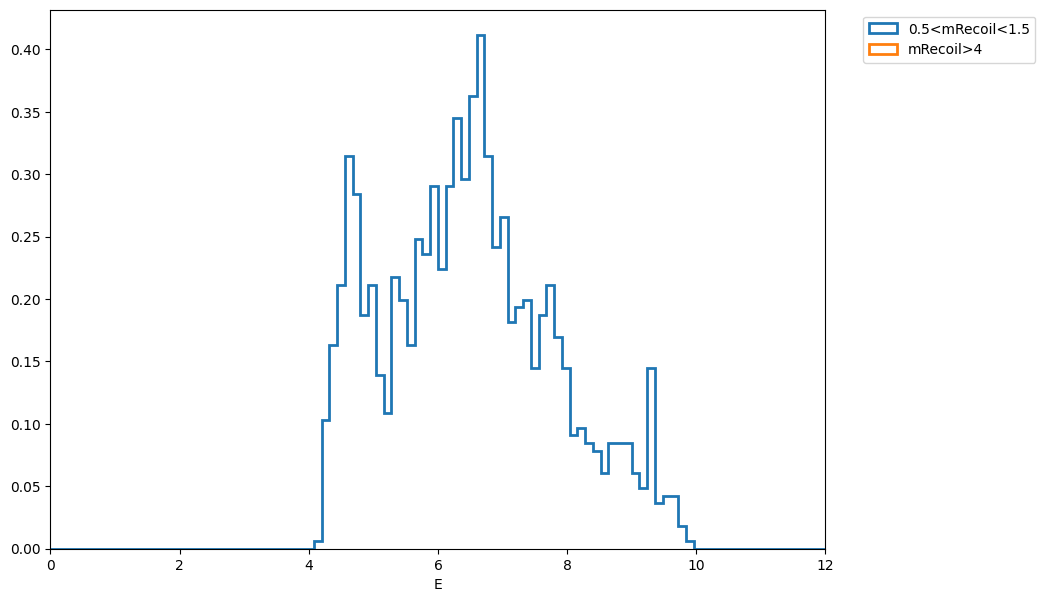

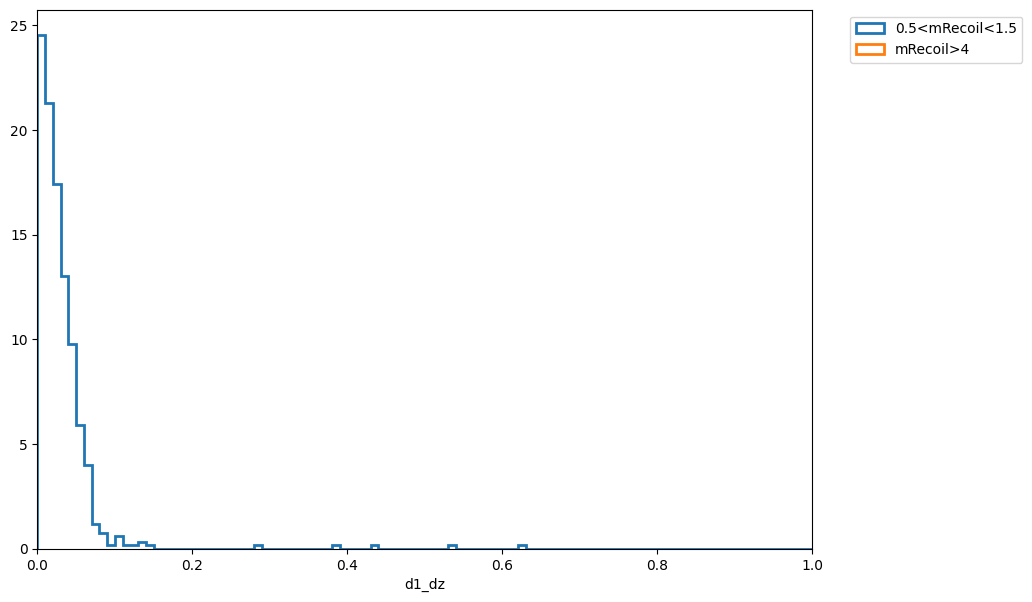

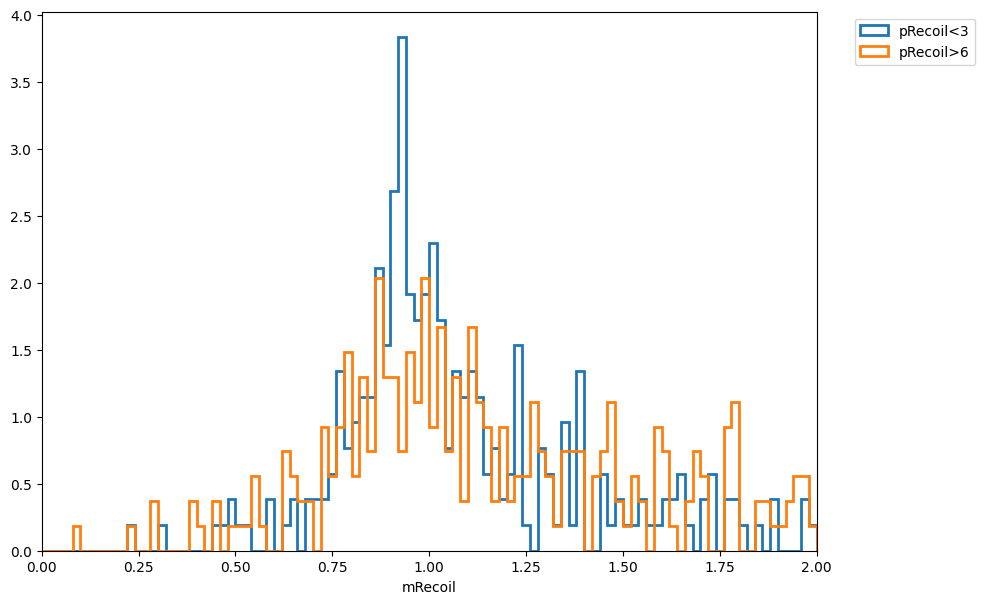

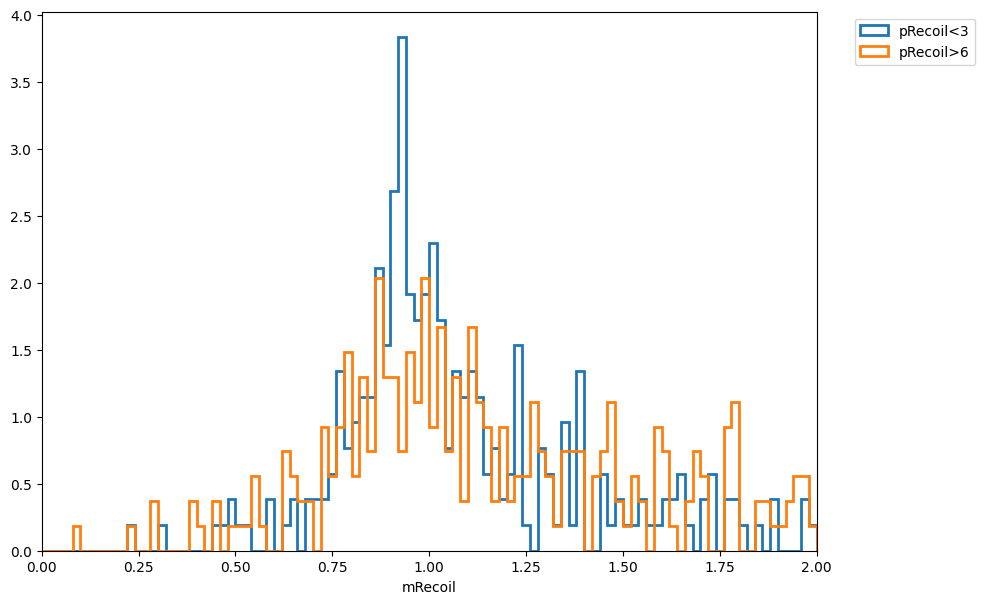

In [87]:
plotOverlayCutList("gamrecp0_E",0,10,cuts=["0.5<mRecoil<1.5","mRecoil>4"])
plotOverlayCutList("CMS_p",0,6,cuts=["0.5<mRecoil<1.5","mRecoil>4"])
plotOverlayCutList("mRecoil",0,2,cuts=["CMS_p>0","CMS_p>4.5"])

plotOverlayCutList("pRecoil",0,12,cuts=["0.5<mRecoil<1.5","mRecoil>4"])
plotOverlayCutList("E",0,12,cuts=["0.5<mRecoil<1.5","mRecoil>4"])
plotOverlayCutList("d1_dz",0,1,cuts=["0.5<mRecoil<1.5","mRecoil>4"])
plotOverlayCutList("mRecoil",0,2,cuts=["pRecoil<3","pRecoil>6"])
plotOverlayCutList("mRecoil",0,2,cuts=["pRecoil<3","pRecoil>6"])


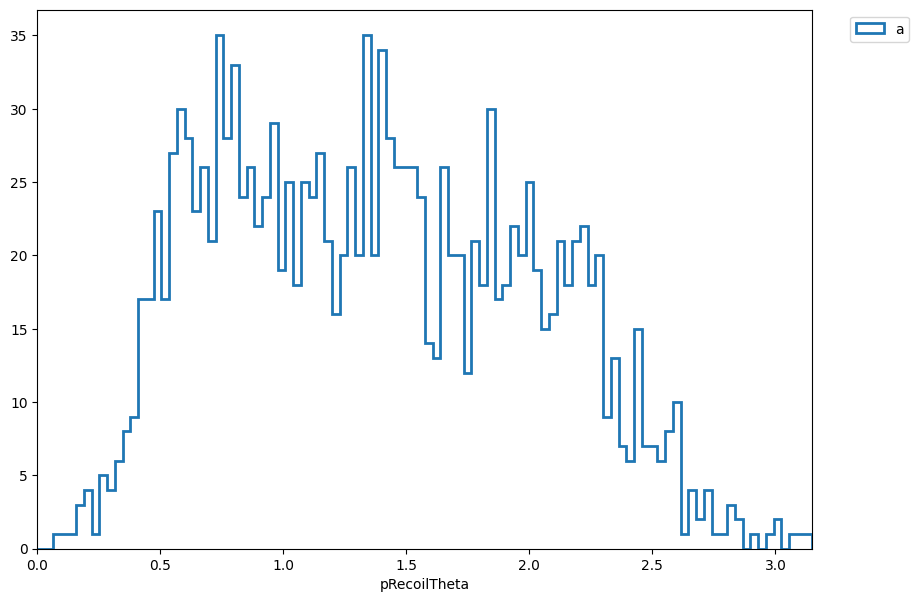

In [46]:
plotOverlayCut("pRecoilTheta",0,3.15,cut="0.5<mRecoil<1.5")

In [47]:
print(len(df_rec.query("0.5<mRecoil<1.5")))
print(len(df_rec.query("0.5<mRecoil<1.5 and 0.5<pRecoilTheta<2.2")))

1512
1235


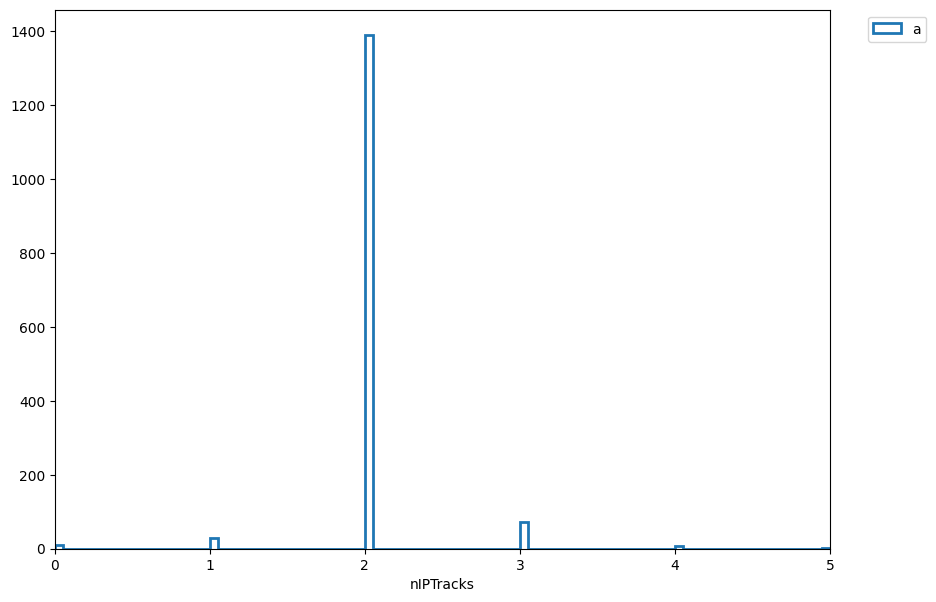

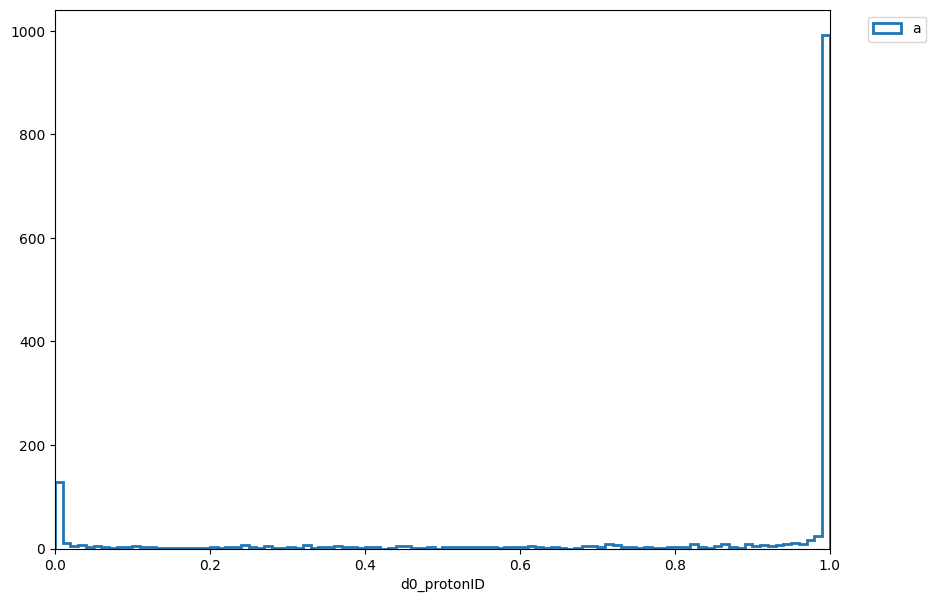

In [53]:
plotOverlayCut("nIPTracks",0,5,cut="0.5<mRecoil<1.5")
plotOverlayCut("d0_protonID",0,1,cut="0.5<mRecoil<1.5")
